In [7]:
import ipynbname

title = ipynbname.name().replace('_', ' ')
from benchmark import benchmark, method_constructor, latex_table, violin_plot

In [8]:
bm = benchmark(
    'BH76',
    'GMTKN55_BH76',
    method_constructor(['HF', 'MP2', 'MP3', 'MP4', 'CCSD', 'PAPT2', 'PAPT3', 'PAPT4', 'CCSD(T)'], counterpoise=False),
    ['cc-pVTZ','cc-pVQZ'],
    max_electrons=100,
    open_shell=False,
    # verbose=True,
    reference='CCSD(T)',
    # check=True,
)

In [4]:
for k in ['reaction energy deviations', 'reaction energies', 'reaction statistics']:
    lt = latex_table(bm[k], title + ': ' + k, 'CCSD(T)')
    # print(lt)
    with open((title + ' ' + k + '.tex').replace(' ', '_'), 'w') as f:
        f.write(lt)
    print(bm[k])


      HF    MP2   MP3    MP4  CCSD  PAPT2  PAPT3  PAPT4
13 46.89   2.68 22.27 -11.17 14.07  18.68  18.72   2.60
14 46.89   2.68 22.27 -11.17 14.07  18.68  18.72   2.60
15 31.65   1.52 17.57  -8.63 10.36  14.51  14.53   2.23
16 31.65   1.52 17.57  -8.63 10.36  14.51  14.53   2.23
17 25.60   6.01 11.45  -1.93 10.90  12.27  12.54   1.46
18 25.60   6.01 11.45  -1.93 10.90  12.27  12.54   1.46
19 14.81   6.04 10.13  -1.50  8.38  10.38  10.58   1.80
20 14.81   6.04 10.13  -1.50  8.38  10.38  10.58   1.80
21 21.80   8.50 13.73  -6.10 10.82  12.57  12.81   2.38
22 56.90  -3.14 20.30  -8.75 13.78  18.33  18.39   2.31
23  7.10   5.90  8.59  -3.18  5.99   7.61   7.78   1.94
24 45.84  -2.76 18.84  -8.23 11.79  16.67  16.70   2.49
25 52.99   0.98 22.18 -10.04 14.91  19.04  19.19   2.76
26 55.71   2.11 25.92 -11.85 16.68  21.70  21.74   2.59
27 38.65   1.12 19.01  -8.41 11.87  16.16  16.23   2.57
28 25.68   2.93 20.22  -8.91  9.93  15.86  15.84   2.53
37 -1.38  18.83  4.57   5.40  1.91   5.08   4.87

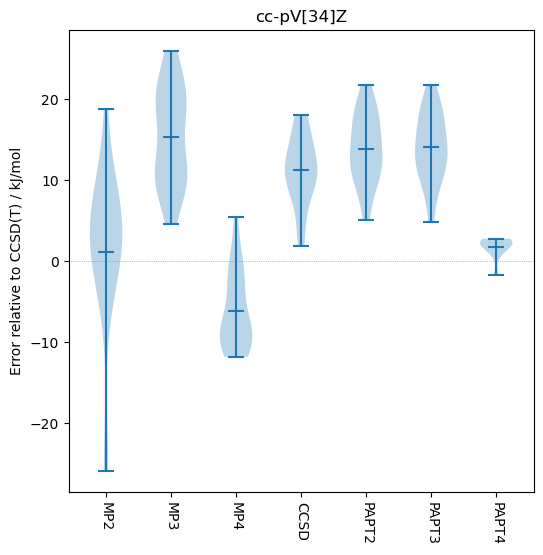

In [5]:
fig = violin_plot(bm)
fig.savefig((title + ' reaction energy deviations.pdf').replace(' ', '_'), transparent=True,bbox_inches='tight',pad_inches=0)
fig

In [10]:
import shutil
from benchmark import unused_project_directories
for d in unused_project_directories(bm):
    shutil.rmtree(d)

In [11]:
from git import Repo
from benchmark import all_project_directories
repo = Repo('.')
repo.git.add(all_project_directories(bm))

''